# Red Wine Quality Prediction Project

## Introduction

This Jupyter Notebook explores the prediction of red wine quality based on physicochemical properties using machine learning.

## Dataset Overview

The dataset contains physicochemical attributes of red wines from the Portuguese "Vinho Verde" region. It includes inputs such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol, with the output being wine quality scored from 0 to 10.

## Methodology

### 1. Data Preprocessing
### 2. Exploratory Data Analysis
### 3. Model Building
### 4. Model Evaluation

## Conclusion

This notebook concludes with insights into the predictive modeling of wine quality and recommendations for future research.



In [1]:

pip install tabulate missingno


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tabulate in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (0.9.0)




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import necessary Python libraries.

In [2]:
!pip install tabulate



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate


# Step 2: Loading the Data

In [4]:
import pandas as pd

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv?raw=true'
data = pd.read_csv(url)


# Step 3: Exploring the Data

In [5]:
# Display the first few rows of the dataset (transposed)
print("First few rows of the dataset (transposed):")
print(tabulate(data.head().transpose(), headers='keys', tablefmt='pretty'))

# Display summary statistics of the dataset (transposed)
print("\nSummary statistics of the dataset (transposed):")
print(tabulate(data.describe().transpose(), headers='keys', tablefmt='pretty'))

# Check for missing values (transposed)
print("\nMissing values in the dataset (transposed):")
print(tabulate(data.isnull().sum().to_frame(name='Missing Values').transpose(), headers='keys', tablefmt='pretty'))

First few rows of the dataset (transposed):
+----------------------+--------+--------+-------+-------+--------+
|                      |   0    |   1    |   2   |   3   |   4    |
+----------------------+--------+--------+-------+-------+--------+
|    fixed acidity     |  7.4   |  7.8   |  7.8  | 11.2  |  7.4   |
|   volatile acidity   |  0.7   |  0.88  | 0.76  | 0.28  |  0.7   |
|     citric acid      |  0.0   |  0.0   | 0.04  | 0.56  |  0.0   |
|    residual sugar    |  1.9   |  2.6   |  2.3  |  1.9  |  1.9   |
|      chlorides       | 0.076  | 0.098  | 0.092 | 0.075 | 0.076  |
| free sulfur dioxide  |  11.0  |  25.0  | 15.0  | 17.0  |  11.0  |
| total sulfur dioxide |  34.0  |  67.0  | 54.0  | 60.0  |  34.0  |
|       density        | 0.9978 | 0.9968 | 0.997 | 0.998 | 0.9978 |
|          pH          |  3.51  |  3.2   | 3.26  | 3.16  |  3.51  |
|      sulphates       |  0.56  |  0.68  | 0.65  | 0.58  |  0.56  |
|       alcohol        |  9.4   |  9.8   |  9.8  |  9.8  |  9.4   |
|   

# Step 4: Preprocessing the Data

In [6]:
# Create binary target variable
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Step 5: Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 6: Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 7: Training the Model and Plotting result 
# using Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       277
           1       0.64      0.70      0.67        43

    accuracy                           0.91       320
   macro avg       0.80      0.82      0.81       320
weighted avg       0.91      0.91      0.91       320



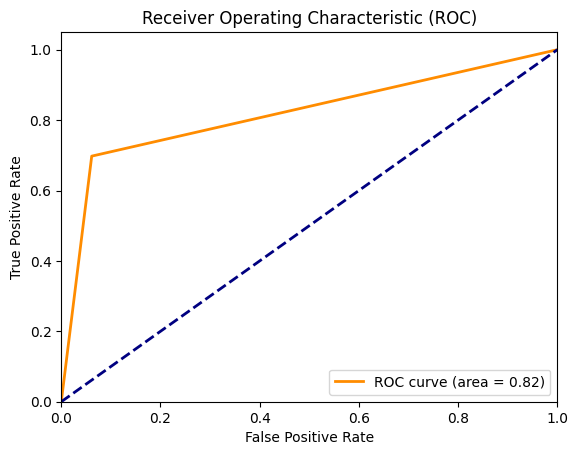

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Step 8: Hyperparameter Tuning

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       277
           1       0.74      0.60      0.67        43

    accuracy                           0.92       320
   macro avg       0.84      0.79      0.81       320
weighted avg       0.91      0.92      0.92       320



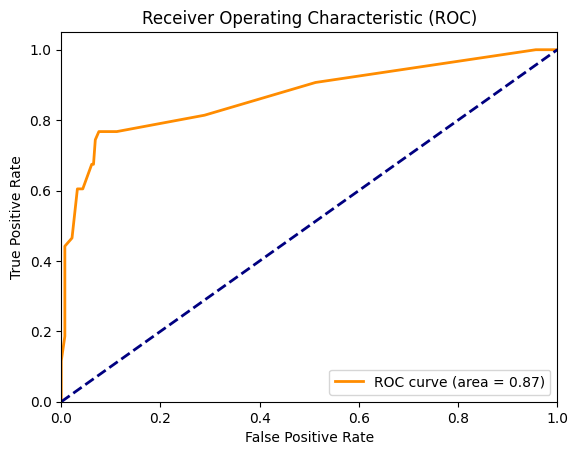

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
print(classification_report(y_test, y_pred_best))

# Compute ROC curve and AUC for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


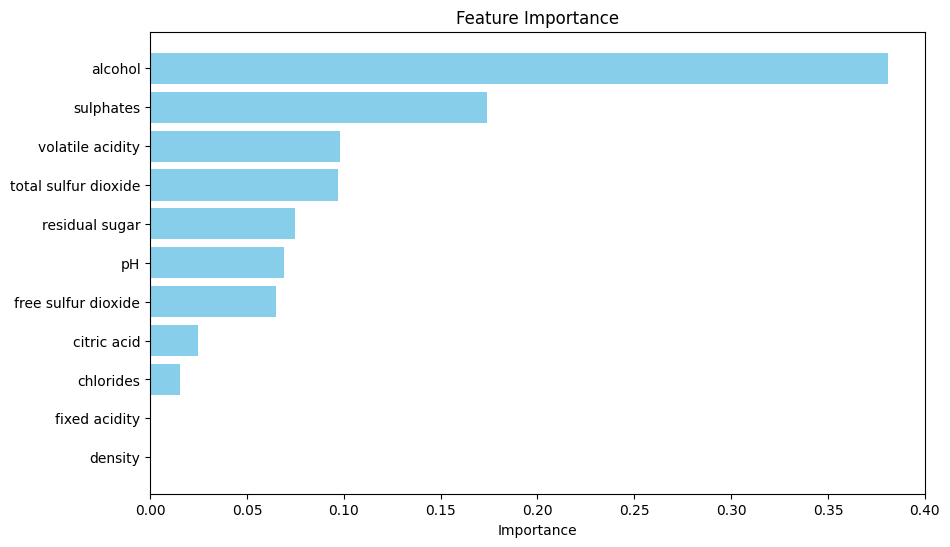

                 feature  importance
10               alcohol    0.381056
9              sulphates    0.174080
1       volatile acidity    0.098188
6   total sulfur dioxide    0.096990
3         residual sugar    0.074814
8                     pH    0.069232
5    free sulfur dioxide    0.065097
2            citric acid    0.024911
4              chlorides    0.015632
0          fixed acidity    0.000000
7                density    0.000000


In [11]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)


In [12]:
# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f'Cross-validation AUC scores: {cv_scores}')
print(f'Mean CV AUC score: {cv_scores.mean()}')


Cross-validation AUC scores: [0.85235941 0.85927602 0.78261151 0.77672915 0.83384349]
Mean CV AUC score: 0.8209639149777559


# Selecting Best Fit Model

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.93      0.58      0.71        43

    accuracy                           0.94       320
   macro avg       0.93      0.79      0.84       320
weighted avg       0.94      0.94      0.93       320



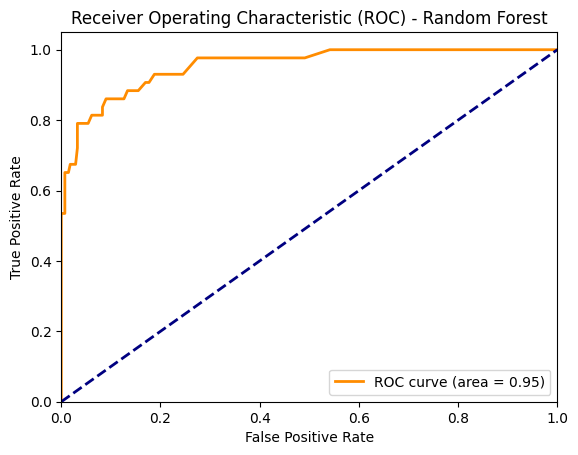

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.79      0.51      0.62        43

    accuracy                           0.92       320
   macro avg       0.86      0.74      0.79       320
weighted avg       0.91      0.92      0.91       320



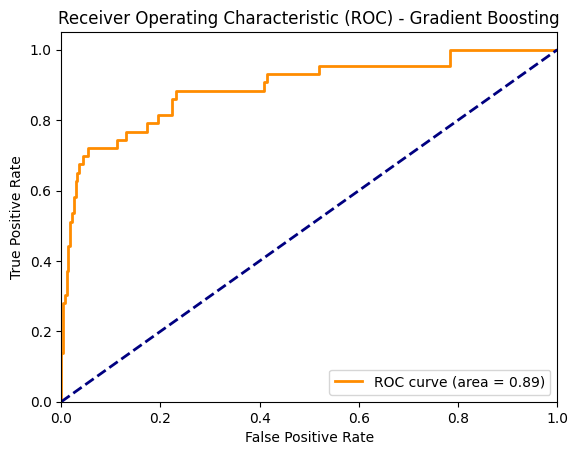

--- Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.76      0.37      0.50        43

    accuracy                           0.90       320
   macro avg       0.84      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



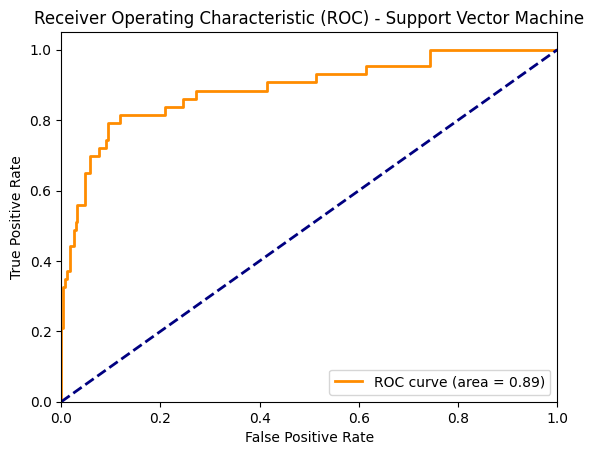

--- Neural Network ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.79      0.51      0.62        43

    accuracy                           0.92       320
   macro avg       0.86      0.74      0.79       320
weighted avg       0.91      0.92      0.91       320



C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


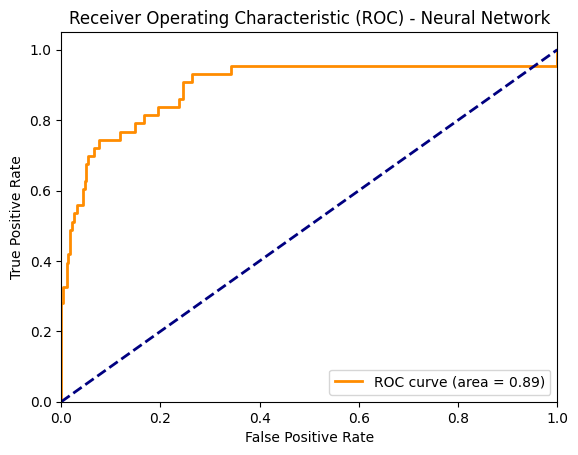

In [13]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
nn_model = MLPClassifier(random_state=42)

# Train and evaluate the models
models = [rf_model, gb_model, svm_model, nn_model]
model_names = ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network']
cv_auc_scores = []

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    cv_auc_scores.append(roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {name}')
    plt.legend(loc='lower right')
    plt.show()


In [14]:
# Print AUC scores for comparison
for name, auc_score in zip(model_names, cv_auc_scores):
    print(f'{name} AUC: {auc_score:.2f}')


Random Forest AUC: 0.95
Gradient Boosting AUC: 0.89
Support Vector Machine AUC: 0.89
Neural Network AUC: 0.89



## Result
### Best Fit Model 
Random Forest strikes a good balance between bias and variance by averaging multiple decision trees. This typically leads to better overall performance on unseen data compared to a single decision tree.

**Random Forest AUC**:  0.95

## Benefits of Random Forest

Random Forest is a powerful ensemble learning method that combines multiple decision trees to improve predictive performance. Here are some key benefits:

- **Reduction of Variance**: By averaging predictions from multiple trees, Random Forest reduces overfitting and improves generalization on unseen data.
- **Feature Importance**: It provides a built-in feature importance measure, allowing us to identify which features are most influential for making predictions.
- **Robustness**: Random Forest is robust to noise and outliers in the data, making it suitable for real-world datasets.

Random Forest outperformed other models in our wine quality prediction task, demonstrating its effectiveness in handling complex relationships and diverse physicochemical properties of wines.

.
